C:\Users\vansh\AppData\Local\Temp\ipykernel_17384\3288946928.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)



Model Accuracy: 80.62%

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.83      0.93      0.88      1036
       Churn       0.70      0.46      0.56       373

    accuracy                           0.81      1409
   macro avg       0.77      0.70      0.72      1409
weighted avg       0.80      0.81      0.79      1409



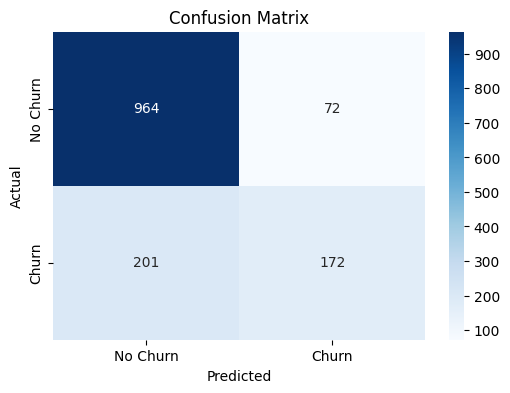

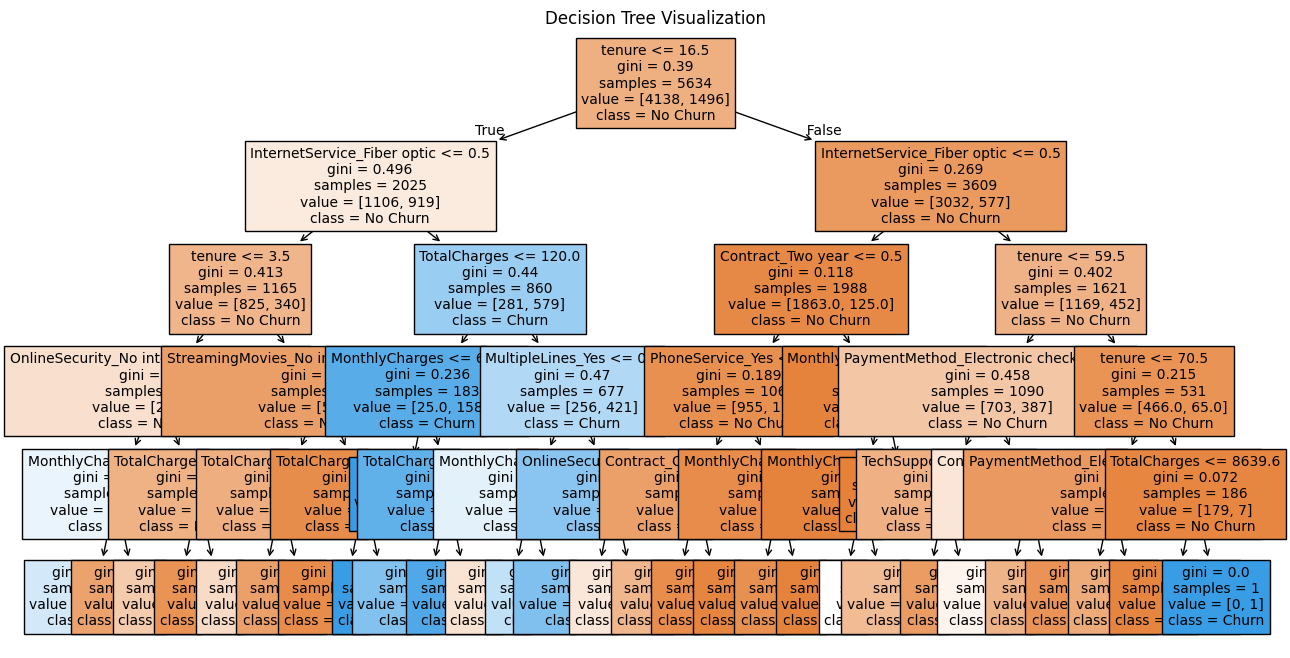

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
file_path = "Telco-Customer-Churn.csv"  
data = pd.read_csv(file_path)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Encode categorical variables
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                    'MultipleLines', 'InternetService', 'OnlineSecurity', 
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                    'StreamingTV', 'StreamingMovies', 'Contract', 
                    'PaperlessBilling', 'PaymentMethod', 'Churn']
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Feature selection
X = data.drop(['customerID', 'Churn_Yes'], axis=1)
y = data['Churn_Yes']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Model Evaluation
y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Churn", "Churn"], filled=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
